In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline






In [6]:
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')

# Display the first few rows to confirm it loaded correctly
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


<Axes: >

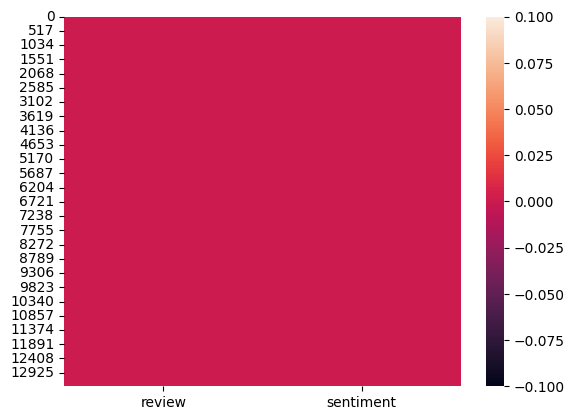

In [7]:
# Check for NaN values:
sns.heatmap(df.isnull())

In [8]:
df.dropna(inplace=True)

<Axes: >

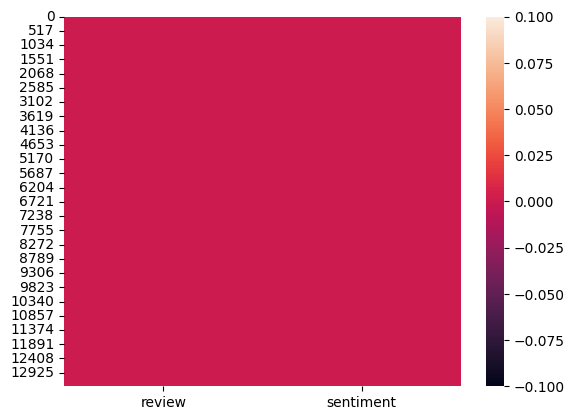

In [9]:
sns.heatmap(df.isnull())

In [10]:
# Check for whitespace strings (it's OK if there aren't any!):

blanks = []

for i,l,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)







In [11]:
blanks

[]

In [12]:
from sklearn.model_selection import train_test_split
# Change 'label' to 'sentiment' to match the actual column name
X=df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])









In [14]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [15]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [16]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1901  265]
 [ 272 1990]]


In [17]:
# Print a classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.87      0.88      0.88      2166
    positive       0.88      0.88      0.88      2262

    accuracy                           0.88      4428
   macro avg       0.88      0.88      0.88      4428
weighted avg       0.88      0.88      0.88      4428



In [18]:
# Print the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.8787262872628726